In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Activation,AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!unzip "/content/drive/MyDrive/ML Proj/ML_Dataset/ML_Datasetage1.zip"

In [ ]:
train_age_data = r"/content/ML_Datasetage1/TrainSet1"

In [ ]:
test_age_data = r"/content/ML_Datasetage1/TestSet1"

In [ ]:
img_width , img_height = 32, 32
import tensorflow.keras.backend as kb
if kb.image_data_format() == "channels_first":
  input_shape = (3,img_width , img_height)
else:
  input_shape = (img_width , img_height, 3)

In [ ]:
train_age_gendata = ImageDataGenerator(rescale = 1. /255, shear_range=0.2, zoom_range= 0.2 , horizontal_flip= True, brightness_range=[0.4, 1.2])
train_age_set = train_age_gendata.flow_from_directory(train_age_data, target_size = (32, 32),batch_size = 64, classes = ['0-6','8-12','15-20','25-32','38-43','48-53','60-100'])
#for creating different type of images, rescaling is for normalizing the data

Found 5076 images belonging to 7 classes.


In [ ]:
test_age_gendata = ImageDataGenerator(rescale = 1. /255)
test_age_set = test_age_gendata.flow_from_directory(test_age_data, target_size = (32, 32),batch_size = 64, classes = ['0-6','8-12','15-20','25-32','38-43','48-53','60-100'])

Found 1050 images belonging to 7 classes.


In [ ]:
#from tensorflow.keras.regularizers import l2

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2), strides = 1))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2), strides = 1))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2), strides = 1))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(7))
model.add(Activation('softmax'))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.0008)

In [ ]:
model.compile(optimizer =opt , loss = ['categorical_crossentropy'] ,metrics = ['accuracy'] )

In [ ]:
model.summary()

In [ ]:
history = model.fit(train_age_set, steps_per_epoch = 80, epochs = 25, validation_data = test_age_set, validation_steps = 16)

Epoch 1/25
80/80 [==============================] - 38s 464ms/step - loss: 2.0068 - accuracy: 0.2120 - val_loss: 1.7783 - val_accuracy: 0.2979
Epoch 2/25
 4/80 [>.............................] - ETA: 32s - loss: 1.6500 - accuracy: 0.3678

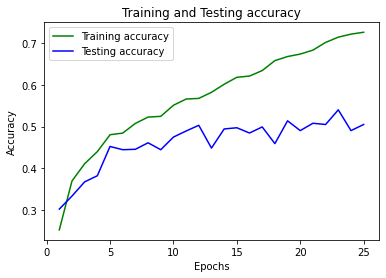

In [ ]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epochs = range(1,26)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, test_acc , 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/ML Proj/ML_Dataset/test2.jpg',target_size = (32, 32))

In [ ]:
test_image = image.img_to_array(test_image)

In [ ]:
test_image = np.expand_dims(test_image, axis = 0)

In [ ]:
train_age_set.class_indices

In [ ]:
test_age_set.class_indices

In [ ]:
age = {0:"0-6", 1:"8-12", 2:"15-20", 3:"25-32", 4:"38-43", 5:"48-53", 6:"60-100"}

In [ ]:
result = model.predict(test_image)
max_prob = np.argmax(result, axis=None)
print(age[max_prob])